In [1]:
# imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the required files
order_report = pd.read_excel('Company X - Order Report.xlsx')
pincode_zones = pd.read_excel('Company X - Pincode Zones.xlsx')
sku_master = pd.read_excel('Company X - SKU Master.xlsx')
invoice = pd.read_excel('Courier Company - Invoice.xlsx')
rates = pd.read_excel('Courier Company - Rates.xlsx')

In [3]:
print('Order Report: \n',order_report.head(),'\n\n','Pincode Zones: \n',pincode_zones.head(),'\n\n',
'SKU Master: ',sku_master.head())

Order Report: 
    ExternOrderNo            SKU  Order Qty
0     2001827036  8904223818706        1.0
1     2001827036  8904223819093        1.0
2     2001827036  8904223819109        1.0
3     2001827036  8904223818430        1.0
4     2001827036  8904223819277        1.0 

 Pincode Zones: 
    Warehouse Pincode  Customer Pincode Zone
0             121003            507101    d
1             121003            486886    d
2             121003            532484    d
3             121003            143001    b
4             121003            515591    d 

 SKU Master:               SKU  Weight (g)
0  8904223815682         210
1  8904223815859         165
2  8904223815866         113
3  8904223815873          65
4  8904223816214         120


# Order Report

In [4]:
order_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


In [5]:
order_report = order_report.rename(columns = {'ExternOrderNo':'Order ID'})
order_report

,Order ID,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0
...,...,...,...
395,2001806229,8904223818942,1.0
396,2001806229,8904223818850,1.0
397,2001806226,8904223818850,2.0
398,2001806210,8904223816214,1.0


# Pincode Zones

In [6]:
pincode_zones.nunique()

Warehouse Pincode      1
Customer Pincode     108
Zone                   3
dtype: int64

In [7]:
pincode_zones['Zone'].value_counts()

b    79
d    38
e     7
Name: Zone, dtype: int64

In [8]:
pincode_zones.isnull().sum()

Warehouse Pincode    0
Customer Pincode     0
Zone                 0
dtype: int64

In [9]:
pincode_zones = pincode_zones.rename(columns={'Zone':'Delivery Zone as per X'})

In [10]:
pincode_zones.head()

,Warehouse Pincode,Customer Pincode,Delivery Zone as per X
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [11]:
pincode_zones = pincode_zones.drop(['Warehouse Pincode'], axis=1)

In [12]:
pincode_zones

,Customer Pincode,Delivery Zone as per X
0,507101,d
1,486886,d
2,532484,d
3,143001,b
4,515591,d
...,...,...
119,325207,b
120,303702,b
121,313301,b
122,173212,e


# SKU Master

In [13]:
sku_master.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [14]:
sku_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         66 non-null     object
 1   Weight (g)  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [15]:
sku_master.isnull().sum()

SKU           0
Weight (g)    0
dtype: int64

In [16]:
sku_master.value_counts()

SKU            Weight (g)
GIFTBOX202002  500           2
8904223815682  210           1
8904223819291  112           1
8904223819093  150           1
8904223819109  100           1
                            ..
8904223818898  140           1
8904223818935  120           1
8904223818942  133           1
8904223818980  110           1
SACHETS001     10            1
Length: 65, dtype: int64

In [17]:
sku_master.nunique()

SKU           65
Weight (g)    31
dtype: int64

In [18]:
sku_master.shape

(66, 2)

In [19]:
sku_master.duplicated().value_counts()

False    65
True      1
dtype: int64

In [20]:
sku_duplicates = sku_master[sku_master.duplicated(subset = 'SKU', keep = False)]
sku_duplicates 

,SKU,Weight (g)
52,GIFTBOX202002,500
56,GIFTBOX202002,500


In [21]:
sku_master.drop_duplicates(subset = 'SKU',inplace = True)
sku_master

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120
...,...,...
61,8904223819505,210
62,8904223819499,210
63,8904223819512,210
64,8904223819543,300


In [22]:
print(order_report.head(),'\n\n',sku_master.head())

     Order ID            SKU  Order Qty
0  2001827036  8904223818706        1.0
1  2001827036  8904223819093        1.0
2  2001827036  8904223819109        1.0
3  2001827036  8904223818430        1.0
4  2001827036  8904223819277        1.0 

              SKU  Weight (g)
0  8904223815682         210
1  8904223815859         165
2  8904223815866         113
3  8904223815873          65
4  8904223816214         120


# Merging Order Report and SKU master

In [23]:
df = pd.merge(order_report, sku_master, on='SKU')

In [24]:
df

,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127
...,...,...,...,...
395,2001806616,8904223819123,1.0,250
396,2001806567,8904223815804,1.0,160
397,2001806567,8904223818577,1.0,150
398,2001806408,8904223819437,2.0,552


In [25]:
df.isnull().sum()

Order ID      0
SKU           0
Order Qty     0
Weight (g)    0
dtype: int64

In [26]:
df.nunique()

Order ID      124
SKU            65
Order Qty       6
Weight (g)     31
dtype: int64

In [27]:
#Add a new column "Total weight as per X (G)" from "Weight (g)" and "Order Qty"
df["Total weight as per X (G)"]=df["Weight (g)"]*df["Order Qty"]
#changing column name
df=df.rename(columns={"Total weight as per X (G)" : "Total weight as per X (KG)"})

In [28]:
#unit change G to KG
df["Total weight as per X (KG)"]=np.round(df['Total weight as per X (KG)']/1000,3)
df

,Order ID,SKU,Order Qty,Weight (g),Total weight as per X (KG)
0,2001827036,8904223818706,1.0,127,0.127
1,2001821995,8904223818706,1.0,127,0.127
2,2001819252,8904223818706,1.0,127,0.127
3,2001816996,8904223818706,1.0,127,0.127
4,2001814580,8904223818706,1.0,127,0.127
...,...,...,...,...,...
395,2001806616,8904223819123,1.0,250,0.250
396,2001806567,8904223815804,1.0,160,0.160
397,2001806567,8904223818577,1.0,150,0.150
398,2001806408,8904223819437,2.0,552,1.104


In [29]:
# grouping in order id and doing sum of total weight
df = df.groupby(['Order ID']).sum()
df

C:\Users\harsh\AppData\Local\Temp\ipykernel_16424\2386908101.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Order ID']).sum()


,Order Qty,Weight (g),Total weight as per X (KG)
Order ID,,,
2001806210,2.0,220,0.220
2001806226,2.0,240,0.480
2001806229,3.0,500,0.500
2001806232,8.0,377,1.302
2001806233,2.0,245,0.245
...,...,...,...
2001821995,2.0,477,0.477
2001822466,10.0,352,1.376
2001823564,6.0,336,0.672


In [30]:
# reset index "Order ID"
df.reset_index(level=0, inplace=True)
df

,Order ID,Order Qty,Weight (g),Total weight as per X (KG)
0,2001806210,2.0,220,0.220
1,2001806226,2.0,240,0.480
2,2001806229,3.0,500,0.500
3,2001806232,8.0,377,1.302
4,2001806233,2.0,245,0.245
...,...,...,...,...
119,2001821995,2.0,477,0.477
120,2001822466,10.0,352,1.376
121,2001823564,6.0,336,0.672
122,2001825261,13.0,611,1.557


In [31]:
# rounding off with ceil funciton
df['Weight slab as per X (KG)'] = df['Total weight as per X (KG)'].apply(lambda x: (math.ceil(x*2)/2))

In [32]:
df.head()

,Order ID,Order Qty,Weight (g),Total weight as per X (KG),Weight slab as per X (KG)
0,2001806210,2.0,220,0.220,0.5
1,2001806226,2.0,240,0.480,0.5
2,2001806229,3.0,500,0.500,0.5
3,2001806232,8.0,377,1.302,1.5
4,2001806233,2.0,245,0.245,0.5


# Courier Company Invoice

In [33]:
invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [34]:
invoice.nunique()

AWB Code                124
Order ID                124
Charged Weight           54
Warehouse Pincode         1
Customer Pincode        108
Zone                      3
Type of Shipment          2
Billing Amount (Rs.)     20
dtype: int64

In [35]:
# checking unique values
invoice['Type of Shipment'].value_counts()

Forward charges            109
Forward and RTO charges     15
Name: Type of Shipment, dtype: int64

In [36]:
# dropping unnecessary columns
df.drop(['Order Qty'], axis=1, inplace=True)
df.drop(['Weight (g)'], axis=1, inplace=True)

In [37]:
df

,Order ID,Total weight as per X (KG),Weight slab as per X (KG)
0,2001806210,0.220,0.5
1,2001806226,0.480,0.5
2,2001806229,0.500,0.5
3,2001806232,1.302,1.5
4,2001806233,0.245,0.5
...,...,...,...
119,2001821995,0.477,0.5
120,2001822466,1.376,1.5
121,2001823564,0.672,1.0
122,2001825261,1.557,2.0


In [38]:
# merging df and invoice on 'Order ID' column
new_df = pd.merge(df, invoice, on='Order ID')

In [39]:
new_df

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3
...,...,...,...,...,...,...,...,...,...,...
119,2001821995,0.477,0.5,1091121183730,0.50,121003,342008,d,Forward charges,45.4
120,2001822466,1.376,1.5,1091121305541,1.10,121003,342301,d,Forward charges,135.0
121,2001823564,0.672,1.0,1091121666133,0.70,121003,492001,d,Forward and RTO charges,172.8
122,2001825261,1.557,2.0,1091121981575,1.60,121003,517128,d,Forward and RTO charges,345.0


In [40]:
# renaming columns
new_df = new_df.rename(columns={'Charged Weight':'Total weight as per Courier Company (KG)','Zone':'Delivery Zone charged by Courier Company','Billing Amount (Rs.)':'Charges Billed by Courier Company (Rs.)'})

In [41]:
new_df.head()

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.)
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3


In [42]:
# creating weight slab as per courier company
new_df['Weight slab charged by Courier Company (KG)'] = new_df['Total weight as per Courier Company (KG)'].apply(lambda x: (math.ceil(x*2)/2))

In [43]:
new_df

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG)
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,0.477,0.5,1091121183730,0.50,121003,342008,d,Forward charges,45.4,0.5
120,2001822466,1.376,1.5,1091121305541,1.10,121003,342301,d,Forward charges,135.0,1.5
121,2001823564,0.672,1.0,1091121666133,0.70,121003,492001,d,Forward and RTO charges,172.8,1.0
122,2001825261,1.557,2.0,1091121981575,1.60,121003,517128,d,Forward and RTO charges,345.0,2.0


# Pincode Zones

In [44]:
pincode_zones.head()

,Customer Pincode,Delivery Zone as per X
0,507101,d
1,486886,d
2,532484,d
3,143001,b
4,515591,d


In [45]:
pincode_zones['Customer Pincode'].value_counts()

302017    5
313001    4
302002    2
302031    2
248001    2
         ..
723146    1
140604    1
831006    1
562110    1
313301    1
Name: Customer Pincode, Length: 108, dtype: int64

In [46]:
pincode_zones[pincode_zones['Customer Pincode'].duplicated()]

,Customer Pincode,Delivery Zone as per X
16,140301,b
50,248001,b
72,302002,b
75,302017,b
77,313001,b
78,313001,b
82,313001,b
90,302017,b
101,335001,b
106,302031,b


In [47]:
pincode_zones[pincode_zones['Customer Pincode']==140301]

,Customer Pincode,Delivery Zone as per X
7,140301,b
16,140301,b


In [48]:
pincode_zones[pincode_zones['Customer Pincode']==302017]

,Customer Pincode,Delivery Zone as per X
74,302017,b
75,302017,b
90,302017,b
113,302017,b
117,302017,b


In [49]:
pincode_zones.drop_duplicates(subset = 'Customer Pincode',inplace=True)

In [50]:
pincode_zones.head()

,Customer Pincode,Delivery Zone as per X
0,507101,d
1,486886,d
2,532484,d
3,143001,b
4,515591,d


In [51]:
# merging new_df and pincode_zones on 'Customer Pincode'
new_df = pd.merge(new_df, pincode_zones, on = 'Customer Pincode')
new_df.head()

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0,b
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0,d
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0,d
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5,d
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0,b


In [52]:
new_df.isnull().sum()

Order ID                                       0
Total weight as per X (KG)                     0
Weight slab as per X (KG)                      0
AWB Code                                       0
Total weight as per Courier Company (KG)       0
Warehouse Pincode                              0
Customer Pincode                               0
Delivery Zone charged by Courier Company       0
Type of Shipment                               0
Charges Billed by Courier Company (Rs.)        0
Weight slab charged by Courier Company (KG)    0
Delivery Zone as per X                         0
dtype: int64

In [53]:
new_df.shape

(124, 12)

In [54]:
new_df.nunique()

Order ID                                       124
Total weight as per X (KG)                      68
Weight slab as per X (KG)                        7
AWB Code                                       124
Total weight as per Courier Company (KG)        54
Warehouse Pincode                                1
Customer Pincode                               108
Delivery Zone charged by Courier Company         3
Type of Shipment                                 2
Charges Billed by Courier Company (Rs.)         20
Weight slab charged by Courier Company (KG)      7
Delivery Zone as per X                           3
dtype: int64

In [55]:
# checking unique values in 'Order ID' column
new_df['Order ID'].value_counts()

2001806210    1
2001809794    1
2001811229    1
2001811192    1
2001811153    1
             ..
2001807036    1
2001807012    1
2001807004    1
2001806968    1
2001827036    1
Name: Order ID, Length: 124, dtype: int64

# Rates

In [56]:
rates.head()

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.50,29.5,23.6,13.6,23.6
1,B,1.00,33.0,28.3,20.5,28.3
2,C,1.25,40.1,38.9,31.9,38.9
3,D,1.50,45.4,44.8,41.3,44.8
4,E,2.00,56.6,55.5,50.7,55.5


In [57]:
new_df.head()

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0,b
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0,d
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0,d
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5,d
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0,b


In [58]:
new_df['Type of Shipment'].value_counts()

Forward charges            109
Forward and RTO charges     15
Name: Type of Shipment, dtype: int64

### From this we know that we are only delivering product in B D E

In [59]:
new_df['Delivery Zone as per X'].value_counts()

b    79
d    38
e     7
Name: Delivery Zone as per X, dtype: int64

In [60]:
invoice

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4
...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0


In [61]:
rates

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.50,29.5,23.6,13.6,23.6
1,B,1.00,33.0,28.3,20.5,28.3
2,C,1.25,40.1,38.9,31.9,38.9
3,D,1.50,45.4,44.8,41.3,44.8
4,E,2.00,56.6,55.5,50.7,55.5


### we only have to find charges for B D E and watch for rates because we have different slab values for different zones

In [62]:
#Determine "Expected Charge as per X (Rs.)" 
x_cost=[] #Creat a empty list
for i in new_df.index:
    l=new_df["Type of Shipment"][i]
    if l == 'Forward charges':     
        j=new_df["Delivery Zone as per X"][i]
        if j== 'b':
            k=new_df["Weight slab as per X (KG)"][i]
            if k<= 1:   # slab is 1 kg from c2 Weight Slabs for b
                p=33   #Taken from c2( Forward Fixed Charge 33.0    Forward Additional Weight Slab Charge 28.3)
                x_cost.append(p)
            else:
                p=33+((k/1)-1)*28.3  #Taken from c2( Forward Fixed Charge 33.0    Forward Additional Weight Slab Charge 28.3)
                x_cost.append(p)
        elif j=='d':
            k=new_df["Weight slab as per X (KG)"][i]
            if k<= 1.5:   # slab is 1.5 kg from c2 Weight Slabs for d
                p=45.4    #Taken from c2( Forward Fixed Charge 45.4   Forward Additional Weight Slab Charge 44.8)
                x_cost.append(p)
            else:
                p=45.4+((k/1.5)-1)*44.8  ##Taken from c2( Forward Fixed Charge 45.4   Forward Additional Weight Slab Charge 44.8)
                x_cost.append(p)                
        elif j=='e':      
            k=new_df["Weight slab as per X (KG)"][i]
            if k<= 2:       # slab is 2 kg from c2 Weight Slabs for e
                p=k*56.6   #Taken from c2( Forward Fixed Charge 56.6   Forward Additional Weight Slab Charge 55.5)
                x_cost.append(p)
            else:
                p=56.6+((k/2)-1)*55.5  #Taken from c2( Forward Fixed Charge 56.6   Forward Additional Weight Slab Charge 55.5)
                x_cost.append(p)
                    
    else:
        
        j=new_df["Delivery Zone as per X"][i]
        if j== 'b':
            k=new_df["Weight slab as per X (KG)"][i]
            if k<= 1:  # slab is 1 kg from c2 Weight Slabs for b
                p=(33+20.5) #from c2  fwd fixed 33.0    fwd additional 28.3  rto fixed 20.5    rto additional 28.3
                x_cost.append(p)
            else:
                p=(33+20.5)+(((k/1)-1)*(28.3+28.3))
                x_cost.append(p)
        elif j=='d':
            k=new_df["Weight slab as per X (KG)"][i]
            if k<= 1.5:   # slab is 1.5 kg from c2 Weight Slabs for d
                p=(45.4+41.3)  #fwd fixed 45.4    fwd additional 44.8  rto fixed 41.3    rto additional 44.8
                x_cost.append(p)
            else:
                p=(45.4+41.3)+(((k/1.5)-1)*(44.8+44.8))
                x_cost.append(p)                
        elif j=='e':
            k=new_df["Weight slab as per X (KG)"][i]
            if k<= 2:           # slab is 2 kg from c2 Weight Slabs for e
                p=(56.6+50.7)  #fwd fixed 56.6    fwd additional 55.5  rto fixed 50.7    rto additional 55.5
                x_cost.append(p)
            else:
                p=(56.6+50.7)+(((k/2)-1)*(55.5+55.5))
                x_cost.append(p) 
print("Done")     

Done


In [63]:
x_cost

[33,
 45.4,
 45.4,
 45.4,
 33,
 45.4,
 45.4,
 33,
 33,
 33,
 33,
 33,
 45.4,
 75.26666666666667,
 45.4,
 33,
 61.3,
 45.4,
 33,
 45.4,
 33,
 33,
 33,
 45.4,
 45.4,
 45.4,
 45.4,
 45.4,
 33,
 33,
 33,
 33,
 33,
 33,
 45.4,
 45.4,
 45.4,
 47.15,
 33,
 45.4,
 45.4,
 33,
 45.4,
 33,
 33,
 75.26666666666667,
 47.15,
 33,
 33,
 33,
 33,
 45.4,
 45.4,
 47.15,
 45.4,
 33,
 86.69999999999999,
 33,
 45.4,
 45.4,
 33,
 33,
 107.30000000000001,
 33,
 33,
 33,
 45.4,
 28.3,
 47.15,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 53.5,
 61.3,
 60.33333333333333,
 105.13333333333333,
 86.69999999999999,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 86.69999999999999,
 33,
 33,
 33,
 33,
 56.6,
 56.6,
 53.5,
 53.5,
 89.6,
 33,
 33,
 75.45,
 33,
 33,
 53.5,
 86.69999999999999,
 33,
 81.8,
 86.69999999999999,
 107.30000000000001,
 28.3,
 33,
 33,
 86.69999999999999,
 33,
 33,
 33,
 33,
 33,
 47.15,
 86.69999999999999,
 116.56666666666665,
 113.2]

In [64]:
len(x_cost)

124

In [65]:
# Add a new column 'Expected Charge as per X (Rs.)' by x_cost list
new_df['Expected Charge as per X (Rs.)']=x_cost

In [66]:
new_df

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Expected Charge as per X (Rs.)
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0,b,33.000000
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0,d,45.400000
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0,d,45.400000
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5,d,45.400000
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0,b,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,0.477,0.5,1091121183730,0.50,121003,342008,d,Forward charges,45.4,0.5,b,33.000000
120,2001822466,1.376,1.5,1091121305541,1.10,121003,342301,d,Forward charges,135.0,1.5,b,47.150000
121,2001823564,0.672,1.0,1091121666133,0.70,121003,492001,d,Forward and RTO charges,172.8,1.0,d,86.700000
122,2001825261,1.557,2.0,1091121981575,1.60,121003,517128,d,Forward and RTO charges,345.0,2.0,d,116.566667


In [67]:
#Add a new column "Expected Charge as per X (Rs.)" by x_cost list
new_df["Expected Charge as per X (Rs.)"]=x_cost

In [68]:
new_df

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Expected Charge as per X (Rs.)
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0,b,33.000000
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0,d,45.400000
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0,d,45.400000
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5,d,45.400000
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0,b,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,0.477,0.5,1091121183730,0.50,121003,342008,d,Forward charges,45.4,0.5,b,33.000000
120,2001822466,1.376,1.5,1091121305541,1.10,121003,342301,d,Forward charges,135.0,1.5,b,47.150000
121,2001823564,0.672,1.0,1091121666133,0.70,121003,492001,d,Forward and RTO charges,172.8,1.0,d,86.700000
122,2001825261,1.557,2.0,1091121981575,1.60,121003,517128,d,Forward and RTO charges,345.0,2.0,d,116.566667


In [69]:
#Add a new column "Difference Between Expected Charges and Billed Charges (Rs.)"
new_df["Difference Between Expected Charges and Billed Charges (Rs.)"]=np.round(new_df["Expected Charge as per X (Rs.)"]-new_df["Charges Billed by Courier Company (Rs.)"],0)

In [70]:
new_df.columns

Index(['Order ID', 'Total weight as per X (KG)', 'Weight slab as per X (KG)',
       'AWB Code', 'Total weight as per Courier Company (KG)',
       'Warehouse Pincode', 'Customer Pincode',
       'Delivery Zone charged by Courier Company', 'Type of Shipment',
       'Charges Billed by Courier Company (Rs.)',
       'Weight slab charged by Courier Company (KG)', 'Delivery Zone as per X',
       'Expected Charge as per X (Rs.)',
       'Difference Between Expected Charges and Billed Charges (Rs.)'],
      dtype='object')

In [71]:
new_df.head()

,Order ID,Total weight as per X (KG),Weight slab as per X (KG),AWB Code,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806210,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5,3.0,b,33.0,-142.0
1,2001806226,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2,1.0,d,45.4,-45.0
2,2001806229,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2,1.0,d,45.4,-45.0
3,2001806232,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0,1.5,d,45.4,-90.0
4,2001806233,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3,1.0,b,33.0,-28.0


In [72]:
#Creating final data frame 
final=new_df.loc[:,['Order ID','AWB Code','Total weight as per X (KG)','Weight slab as per X (KG)','Total weight as per Courier Company (KG)','Weight slab charged by Courier Company (KG)','Delivery Zone as per X','Delivery Zone charged by Courier Company','Expected Charge as per X (Rs.)','Charges Billed by Courier Company (Rs.)','Difference Between Expected Charges and Billed Charges (Rs.)']]

# Output data - 1 

In [73]:
final

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806210,1091117221940,0.220,0.5,2.92,3.0,b,b,33.000000,174.5,-142.0
1,2001806226,1091117222065,0.480,0.5,0.68,1.0,d,d,45.400000,90.2,-45.0
2,2001806229,1091117222080,0.500,0.5,0.71,1.0,d,d,45.400000,90.2,-45.0
3,2001806232,1091117222124,1.302,1.5,1.30,1.5,d,d,45.400000,135.0,-90.0
4,2001806233,1091117222135,0.245,0.5,0.78,1.0,b,b,33.000000,61.3,-28.0
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,0.477,0.5,0.50,0.5,b,d,33.000000,45.4,-12.0
120,2001822466,1091121305541,1.376,1.5,1.10,1.5,b,d,47.150000,135.0,-88.0
121,2001823564,1091121666133,0.672,1.0,0.70,1.0,d,d,86.700000,172.8,-86.0
122,2001825261,1091121981575,1.557,2.0,1.60,2.0,d,d,116.566667,345.0,-228.0


In [74]:
correctly_charged_order=final[final["Difference Between Expected Charges and Billed Charges (Rs.)"]==0]
correctly_charged_order

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
24,2001806686,1091117229555,0.240,0.5,0.15,0.5,d,d,45.4,45.4,0.0
35,2001807012,1091117229345,0.240,0.5,0.15,0.5,d,d,45.4,45.4,0.0
38,2001808118,1091117435134,0.343,0.5,0.50,0.5,b,b,33.0,33.0,0.0
40,2001807186,1091117323812,0.500,0.5,0.50,0.5,d,d,45.4,45.4,0.0
42,2001807290,1091117324206,0.500,0.5,0.50,0.5,d,d,45.4,45.4,0.0
51,2001807930,1091117327695,0.240,0.5,0.15,0.5,d,d,45.4,45.4,0.0
62,2001808295,1091117435661,0.245,0.5,0.20,0.5,e,e,107.3,107.3,0.0


In [75]:
f1=correctly_charged_order["Charges Billed by Courier Company (Rs.)"].sum(axis = 0, skipna = True)
print("Number of correctly charged order id :",correctly_charged_order.shape[0])
print("Total orders ,  where X has been correctly charged :",f1)

Number of correctly charged order id : 7
Total orders ,  where X has been correctly charged : 367.3


In [76]:
overcharged_order=final[final["Difference Between Expected Charges and Billed Charges (Rs.)"]<0]
overcharged_order

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806210,1091117221940,0.220,0.5,2.92,3.0,b,b,33.000000,174.5,-142.0
1,2001806226,1091117222065,0.480,0.5,0.68,1.0,d,d,45.400000,90.2,-45.0
2,2001806229,1091117222080,0.500,0.5,0.71,1.0,d,d,45.400000,90.2,-45.0
3,2001806232,1091117222124,1.302,1.5,1.30,1.5,d,d,45.400000,135.0,-90.0
4,2001806233,1091117222135,0.245,0.5,0.78,1.0,b,b,33.000000,61.3,-28.0
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,0.477,0.5,0.50,0.5,b,d,33.000000,45.4,-12.0
120,2001822466,1091121305541,1.376,1.5,1.10,1.5,b,d,47.150000,135.0,-88.0
121,2001823564,1091121666133,0.672,1.0,0.70,1.0,d,d,86.700000,172.8,-86.0
122,2001825261,1091121981575,1.557,2.0,1.60,2.0,d,d,116.566667,345.0,-228.0


In [77]:
f2=overcharged_order["Difference Between Expected Charges and Billed Charges (Rs.)"].sum(axis = 0, skipna = True)
print("Number of overcharged order id :",overcharged_order.shape[0])
print("Total Orders where X has been overcharged :",f2)

Number of overcharged order id : 116
Total Orders where X has been overcharged : -7983.0


In [78]:
undercharged_order=final[final["Difference Between Expected Charges and Billed Charges (Rs.)"]>0]
undercharged_order

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
95,2001811475,1091121844806,0.689,1.0,0.5,0.5,e,b,56.6,33.0,24.0


In [79]:
f3=undercharged_order["Difference Between Expected Charges and Billed Charges (Rs.)"].sum(axis = 0, skipna = True)
print("Number of undercharged order id :",undercharged_order.shape[0])
print("Total Orders where X has been undercharged",f3)


Number of undercharged order id : 1
Total Orders where X has been undercharged 24.0


# Create a dataframe for output 2

In [80]:
df_ex=pd.DataFrame({"Headings":["Total orders where X has been correctly charged","Total Orders where X has been overcharged","Total Orders where X has been undercharged"],"Count":[7,116,1],"Amount (Rs.)":[f1,f2,f3]})

In [81]:
df_ex

,Headings,Count,Amount (Rs.)
0,Total orders where X has been correctly charged,7,367.3
1,Total Orders where X has been overcharged,116,-7983.0
2,Total Orders where X has been undercharged,1,24.0


In [82]:
# Save to Excel with different sheets
with pd.ExcelWriter('Final_Output.xlsx', engine='xlsxwriter') as writer:
    df_ex.to_excel(writer, sheet_name='Summary', index=False)
    final.to_excel(writer, sheet_name='Calculations', index=False)


# END

## Trying out visualizations

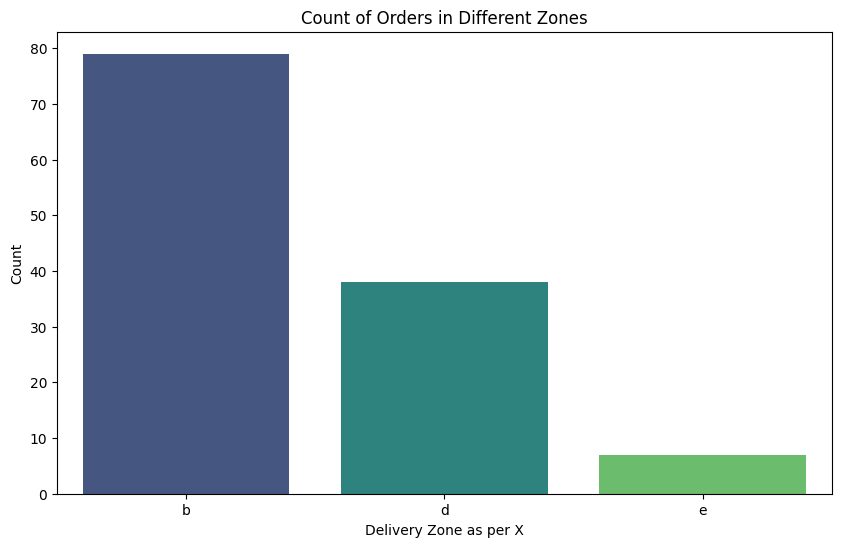

In [83]:
# Visualizing count of orders in different zones with a color palette
plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery Zone as per X', data=new_df, palette='viridis')
plt.title('Count of Orders in Different Zones')
plt.xlabel('Delivery Zone as per X')
plt.ylabel('Count')
plt.show()

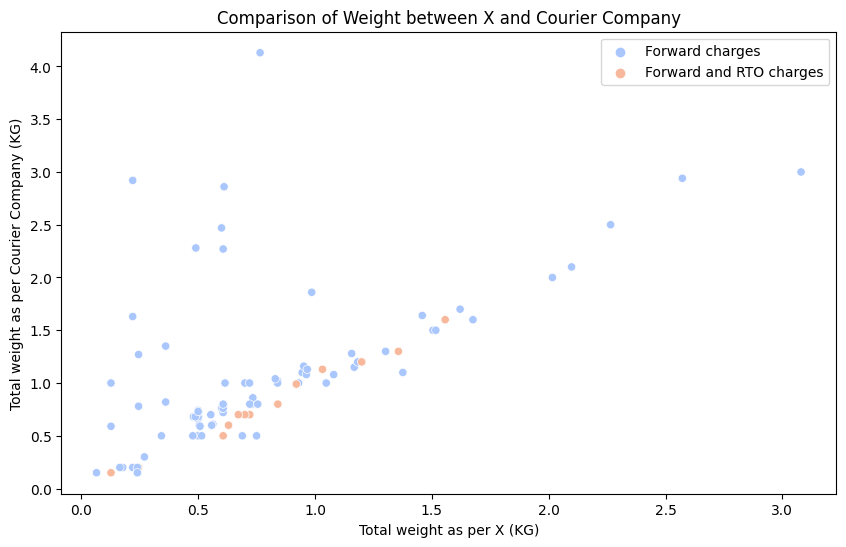

In [84]:
# Scatter plot for 'Total weight as per X (KG)' vs. 'Total weight as per Courier Company (KG)' with a color gradient
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total weight as per X (KG)', y='Total weight as per Courier Company (KG)', data=new_df, hue='Type of Shipment', palette='coolwarm')
plt.title('Comparison of Weight between X and Courier Company')
plt.xlabel('Total weight as per X (KG)')
plt.ylabel('Total weight as per Courier Company (KG)')
plt.legend()
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16424\3449368203.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


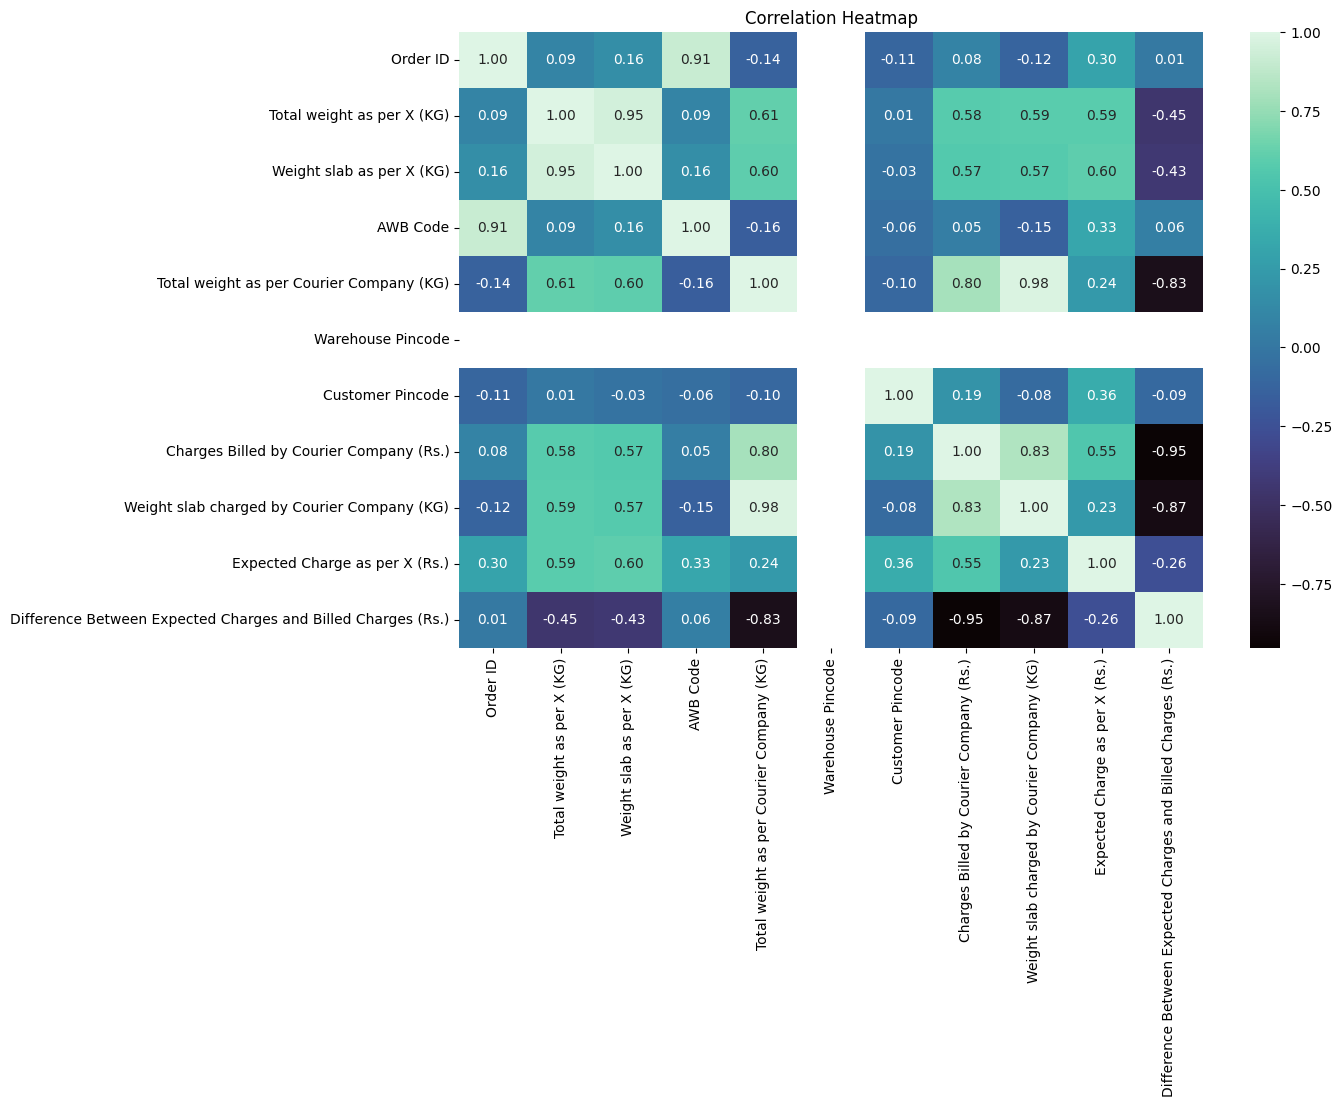

In [85]:
# Heatmap for correlation with a vibrant color palette
correlation_matrix = new_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy

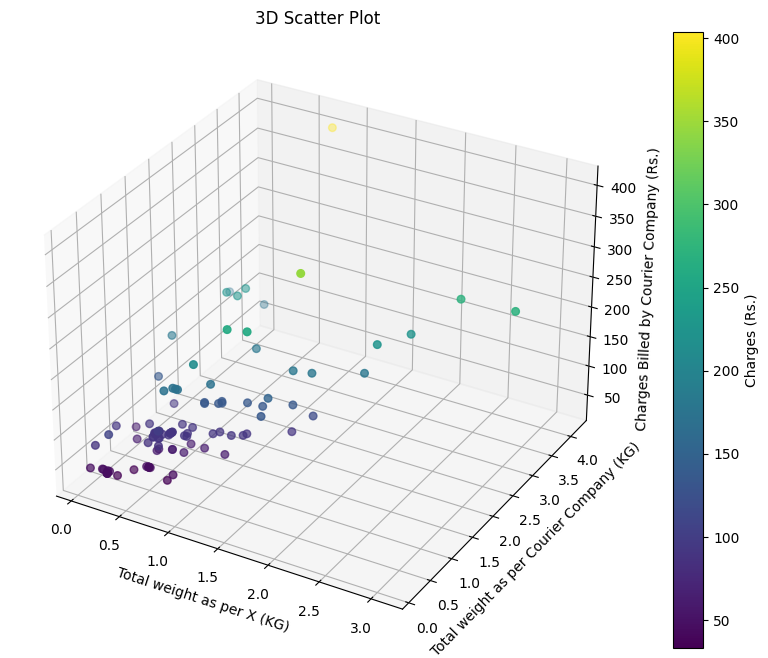

In [87]:
# 3D Scatter plot for 'Total weight as per X (KG)', 'Total weight as per Courier Company (KG)', and 'Charges Billed by Courier Company (Rs.)'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(new_df['Total weight as per X (KG)'], new_df['Total weight as per Courier Company (KG)'], new_df['Charges Billed by Courier Company (Rs.)'], c=new_df['Charges Billed by Courier Company (Rs.)'], cmap='viridis', s=30)
ax.set_xlabel('Total weight as per X (KG)')
ax.set_ylabel('Total weight as per Courier Company (KG)')
ax.set_zlabel('Charges Billed by Courier Company (Rs.)')
ax.set_title('3D Scatter Plot')
fig.colorbar(scatter, ax=ax, label='Charges (Rs.)', orientation='vertical')
plt.show()